In [ ]:
%pip install pandas numpy

In [ ]:
pip install scikit-learn scikit-learn-extra imbalanced-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn scikit-learn-extra imbalanced-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
pip uninstall pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pandas-2.2.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.2.2


In [ ]:
pip install pandas==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd
print(pd.__version__)

2.2.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids # Untuk K-Medoids
from sklearn.preprocessing import StandardScaler, RobustScaler # Jika ada fitur yang belum di-scale
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Untuk SMOTE (jika ingin bereksperimen)
from imblearn.over_sampling import SMOTE

# Mengatur agar plot tampil inline di Jupyter Notebook (jika menggunakan)
%matplotlib inline
# Mengatur style plot
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# ===== SETUP DAN IMPORT =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# evaluasi
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

# Visualisasi
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("Setup completed!")

Setup completed!


In [ ]:
# ===== LOAD DATA DENGAN OPTIMASI MEMORY =====
def load_data_optimized(file_path, sample_size=None):
    """
    Load data dengan optimasi memory untuk mengatasi MemoryError
    """
    print("Loading data with memory optimization...")

    # Baca dengan chunk untuk estimasi ukuran
    chunk_size = 100000
    chunks = []
    total_rows = 0

    # Jika ingin sample, baca seluruh data terlebih dahulu
    if sample_size:
        print(f"Loading sample of {sample_size} rows...")
        df = pd.read_csv(file_path, nrows=sample_size, parse_dates=["event_time"])
    else:
        # Untuk dataset penuh, gunakan dtype optimization
        dtype_dict = {
            'product_id': 'int32',
            'category_id': 'int64',
            'price': 'float32',
            'user_id': 'int32'
        }

        try:
            df = pd.read_csv(file_path, dtype=dtype_dict, parse_dates=["event_time"])
        except MemoryError:
            print("Memory error - using sample of 1M rows")
            df = pd.read_csv(file_path, nrows=1000000, parse_dates=["event_time"])

    print(f"Loaded data shape: {df.shape}")
    return df

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file
data_path = "2019-Oct.csv"

# Load only 300000 rows
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mkechinov/ecommerce-behavior-data-from-multi-category-store",
    data_path,
    pandas_kwargs={"nrows": 300000}
)

print("Loaded shape:", df.shape)
print(df.head())

100%|██████████| 1.61G/1.61G [00:12<00:00, 139MB/s]

Extracting zip of 2019-Oct.csv...


Loaded shape: (300000, 9)
                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-

In [ ]:
import pandas as pd

# Set the path to the file
  data_path = "sampled_data.csv"


df = pd.read_csv(data_path)

print("Loaded shape:", df.shape)
print(df.head())

Loaded shape: (300000, 9)
                event_time event_type  product_id          category_id  \
0  2019-10-09 02:46:19 UTC       view    29900078  2059484601444729123   
1  2019-10-21 16:17:11 UTC       view     1801805  2053013554415534427   
2  2019-10-21 14:42:20 UTC       cart     1004870  2053013555631882655   
3  2019-10-03 18:40:22 UTC       view     5701087  2053013553970938175   
4  2019-10-19 08:58:51 UTC       view     5300097  2053013563173241677   

             category_code      brand    price    user_id  \
0                      NaN       peda  1647.40  532353313   
1     electronics.video.tv      artel   231.60  536042235   
2   electronics.smartphone    samsung   284.02  517143806   
3  auto.accessories.player        jvc    51.48  556492770   
4                      NaN  remington    39.87  561838859   

                           user_session  
0  47059489-3a63-4353-9eab-0e239d5cb5aa  
1  a65ee34b-7701-4b25-95e7-45a1259e747e  
2  a9ba13a7-afac-41ca-a3bc-016c58090

In [ ]:
# Data Cleaning
df = df.dropna(subset=["user_id", "user_session"])
df = df[df["event_type"].isin(["view", "cart", "remove_from_cart", "purchase"])]
print(f"Shape after cleaning: {df.shape}")

Shape after cleaning: (300000, 9)


In [ ]:
# Feature Engineering
# 1. Event Counts
event_counts = (
    df.pivot_table(
        index="user_id",
        columns="event_type",
        values="product_id",
        aggfunc="count",
        fill_value=0
    )
    .rename(columns={
        'view': 'view_count',
        'cart': 'cart_count',
        'remove_from_cart': 'remove_count',
        'purchase': 'purchase_count'
    })
)

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])


In [ ]:
# Pastikan event_time dalam format datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filter hanya event pembelian
group_purchase = df[df['event_type'] == 'purchase']

#2. Analisis RFM Recency, Frequency, Monetary)
# Recency
if len(group_purchase) > 0:
    last_purchase = (
        group_purchase
        .groupby('user_id')['event_time']
        .max()
        .to_frame('last_purchase_date')
    )
    current_date = df['event_time'].max()
    last_purchase['recency_days'] = (
        current_date - last_purchase['last_purchase_date']
    ).dt.days

    # Frequency
    frequency = (
        group_purchase
        .groupby('user_id')['event_time']
        .count()
        .to_frame('frequency')
    )

    # Monetary
    monetary = (
        group_purchase
        .groupby('user_id')['price']
        .sum()
        .to_frame('monetary')
    )
else:
    # Jika tidak ada purchase, buat dataframe kosong
    last_purchase = pd.DataFrame({'recency_days': []})
    frequency = pd.DataFrame({'frequency': []})
    monetary = pd.DataFrame({'monetary': []})


In [ ]:
# Gabungkan fitur
data = (
    event_counts
    .join(last_purchase['recency_days'], how='left')
    .join(frequency, how='left')
    .join(monetary, how='left')
)

In [ ]:
# Handle missing values
max_recency = last_purchase['recency_days'].max() if len(last_purchase) > 0 else 30
data.fillna({
    'recency_days': max_recency,
    'frequency': 0,
    'monetary': 0
}, inplace=True)

In [ ]:
# ===== DATA TRANSFORMATION =====
# Log transform untuk mengatasi skewness
to_log = ['view_count', 'cart_count', 'remove_count', 'purchase_count', 'frequency', 'monetary']
for col in to_log:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])

# Pilih fitur untuk clustering
features_for_clustering = [
    'log_view_count', 'log_cart_count', 'log_remove_count',
    'log_purchase_count', 'recency_days', 'log_frequency', 'log_monetary'
]

In [ ]:
# Filter fitur yang ada
available_features = [f for f in features_for_clustering if f in data.columns]
print(f"Available features for clustering: {available_features}")


Available features for clustering: ['log_view_count', 'log_cart_count', 'log_purchase_count', 'recency_days', 'log_frequency', 'log_monetary']


In [ ]:
# Prepare data untuk clustering
X = data[available_features].copy()

In [ ]:
# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=available_features, index=X.index)

print("Data transformation completed!")

Data transformation completed!


In [ ]:
# ===== ANALISIS DISTRIBUSI DATA =====
def analyze_data_distribution(data, features):
    """Analisis distribusi data untuk menentukan need SMOTE"""

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i, feature in enumerate(features):
        if i < len(axes):
            axes[i].hist(data[feature], bins=50, alpha=0.7)
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Analisis imbalance pada purchase behavior
    purchase_behavior = data['log_purchase_count'].apply(
        lambda x: 'Active Buyer' if x > 0 else 'Non Buyer'
    )

    print("Purchase Behavior Distribution:")
    print(purchase_behavior.value_counts())
    print("\nPercentage:")
    print(purchase_behavior.value_counts(normalize=True) * 100)

    return purchase_behavior

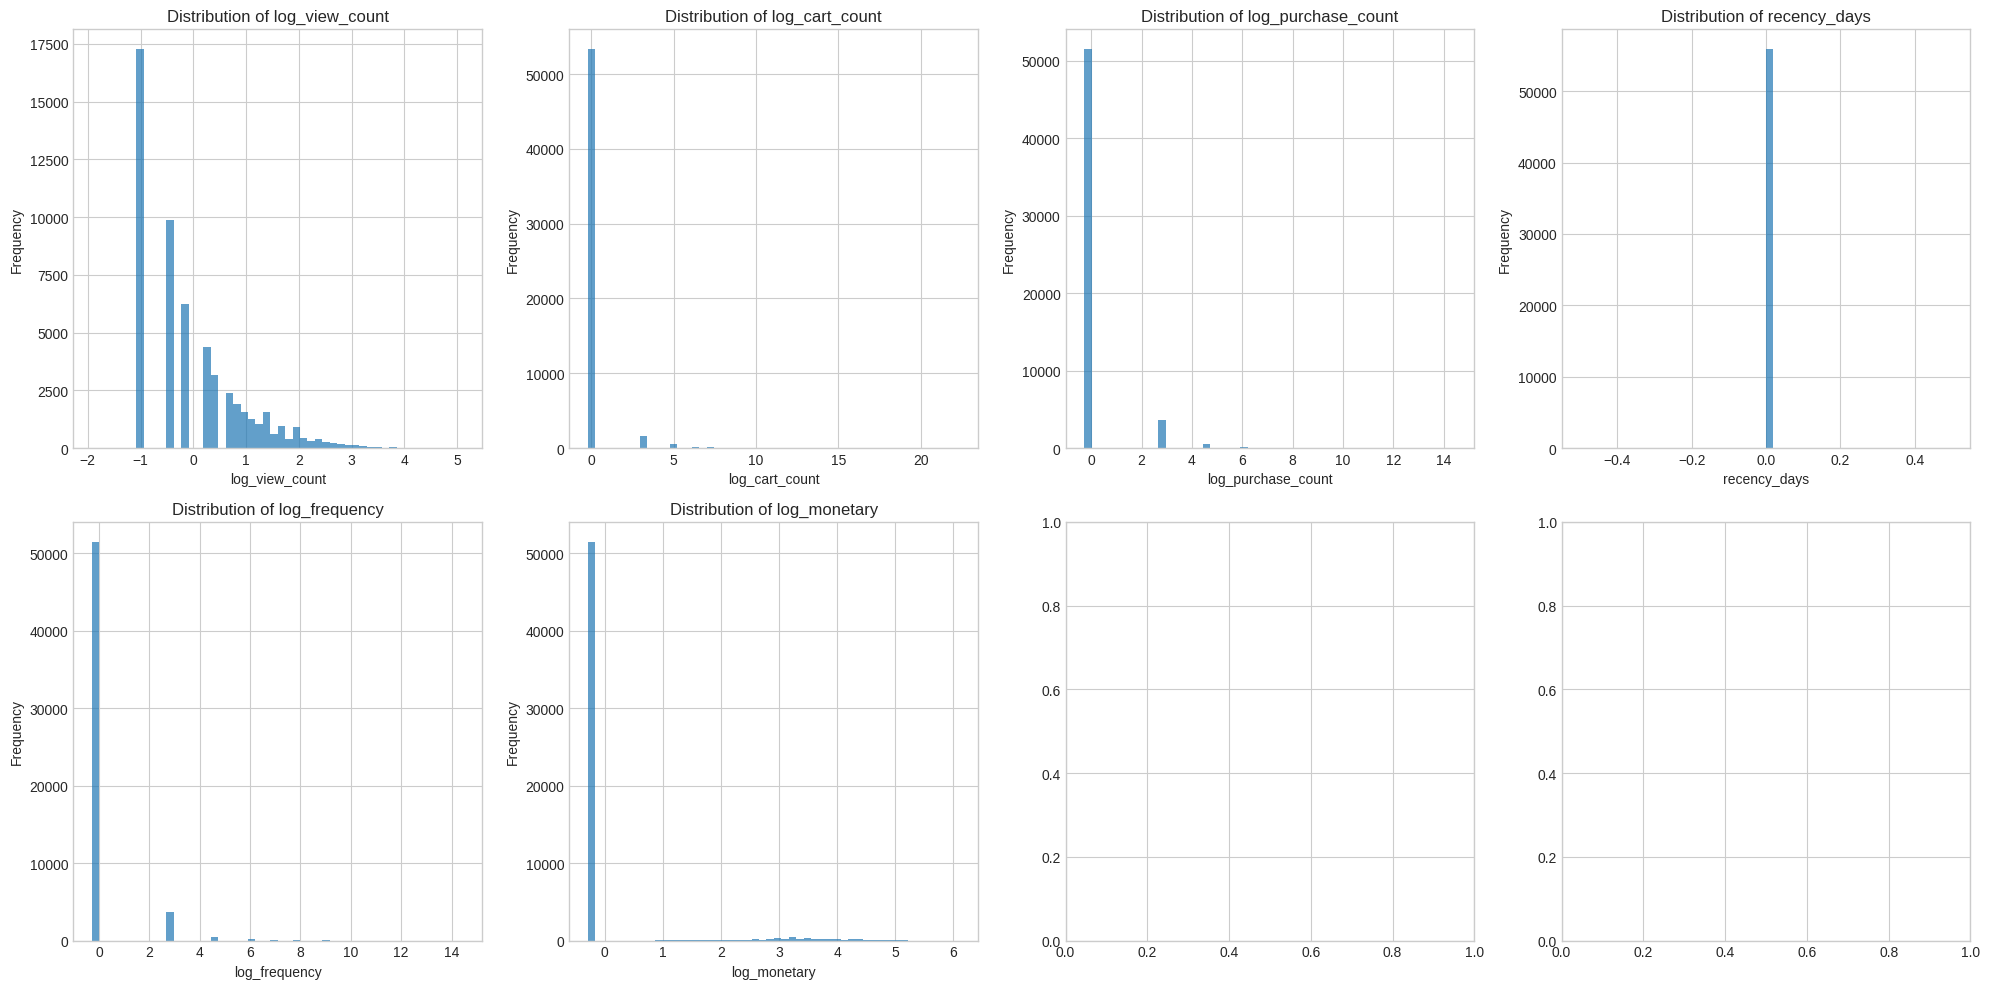

Purchase Behavior Distribution:
log_purchase_count
Non Buyer       51449
Active Buyer     4433
Name: count, dtype: int64

Percentage:
log_purchase_count
Non Buyer       92.067213
Active Buyer     7.932787
Name: proportion, dtype: float64


In [ ]:
# Analisis distribusi
purchase_labels = analyze_data_distribution(X_scaled_df, available_features)

In [ ]:
# ===== IMPLEMENTASI K-MEANS =====
def perform_kmeans_clustering(X, n_clusters_range=range(2, 11), random_state=42):
    """Implementasi K-Means dengan evaluasi berbagai jumlah cluster"""

    results = {}
    silhouette_scores = []
    inertias = []

    print("Performing K-Means clustering...")

    for n_clusters in n_clusters_range:
        # Fit K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(X)

        # Evaluasi
        silhouette_avg = silhouette_score(X, cluster_labels)
        inertia = kmeans.inertia_

        results[n_clusters] = {
            'model': kmeans,
            'labels': cluster_labels,
            'silhouette_score': silhouette_avg,
            'inertia': inertia
        }

        silhouette_scores.append(silhouette_avg)
        inertias.append(inertia)

        print(f"K={n_clusters}: Silhouette Score = {silhouette_avg:.4f}, Inertia = {inertia:.2f}")

    return results, silhouette_scores, inertias

In [ ]:
print(f"Shape data yang akan di-cluster: {X_scaled.shape}")
print(f"Data source: sampled_data.csv dengan {len(df)} baris")

Shape data yang akan di-cluster: (55882, 6)
Data source: sampled_data.csv dengan 300000 baris


In [ ]:
# K-Means pada data original
kmeans_results_orig, sil_scores_orig, inertias_orig = perform_kmeans_clustering(X_scaled)

Performing K-Means clustering...
K=2: Silhouette Score = 0.8004, Inertia = 114311.65
K=3: Silhouette Score = 0.6048, Inertia = 78790.37
K=4: Silhouette Score = 0.6110, Inertia = 56118.26
K=5: Silhouette Score = 0.6369, Inertia = 41262.09
K=6: Silhouette Score = 0.6347, Inertia = 33527.98
K=7: Silhouette Score = 0.6332, Inertia = 28260.79
K=8: Silhouette Score = 0.6332, Inertia = 24233.80
K=9: Silhouette Score = 0.6764, Inertia = 21350.96
K=10: Silhouette Score = 0.6763, Inertia = 19313.54


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
import numpy as np

def perform_kmedoids_simulation(X, n_clusters_range=range(2, 11), random_state=42):
    """Simulasi K-Medoids menggunakan KMeans dan medoid trick tanpa sampling"""
    results = {}
    silhouette_scores = []

    print("Performing K-Medoids Simulation via KMeans trick...")

    for n_clusters in n_clusters_range:
        # 1. Fit KMeans untuk estimasi centroid
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(X)

        # 2. Cari medoid (poin nyata terdekat ke centroid)
        closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
        medoids = X[closest]

        # 3. Hitung jarak ke medoid dan assign cluster
        distances = cdist(X, medoids)
        labels = np.argmin(distances, axis=1)

        # 4. Evaluasi
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

        results[n_clusters] = {
            'medoids': medoids,
            'labels': labels,
            'silhouette_score': silhouette_avg
        }

        print(f"K={n_clusters}: Silhouette Score = {silhouette_avg:.4f}")

    return results, silhouette_scores


In [ ]:
kmedoids_sim_results, sil_scores_sim = perform_kmedoids_simulation(X_scaled)


Performing K-Medoids Simulation via KMeans trick...
K=2: Silhouette Score = 0.8003
K=3: Silhouette Score = 0.6035
K=4: Silhouette Score = 0.5836
K=5: Silhouette Score = 0.6226
K=6: Silhouette Score = 0.6333
K=7: Silhouette Score = 0.6322
K=8: Silhouette Score = 0.6737
K=9: Silhouette Score = 0.6761
K=10: Silhouette Score = 0.6766


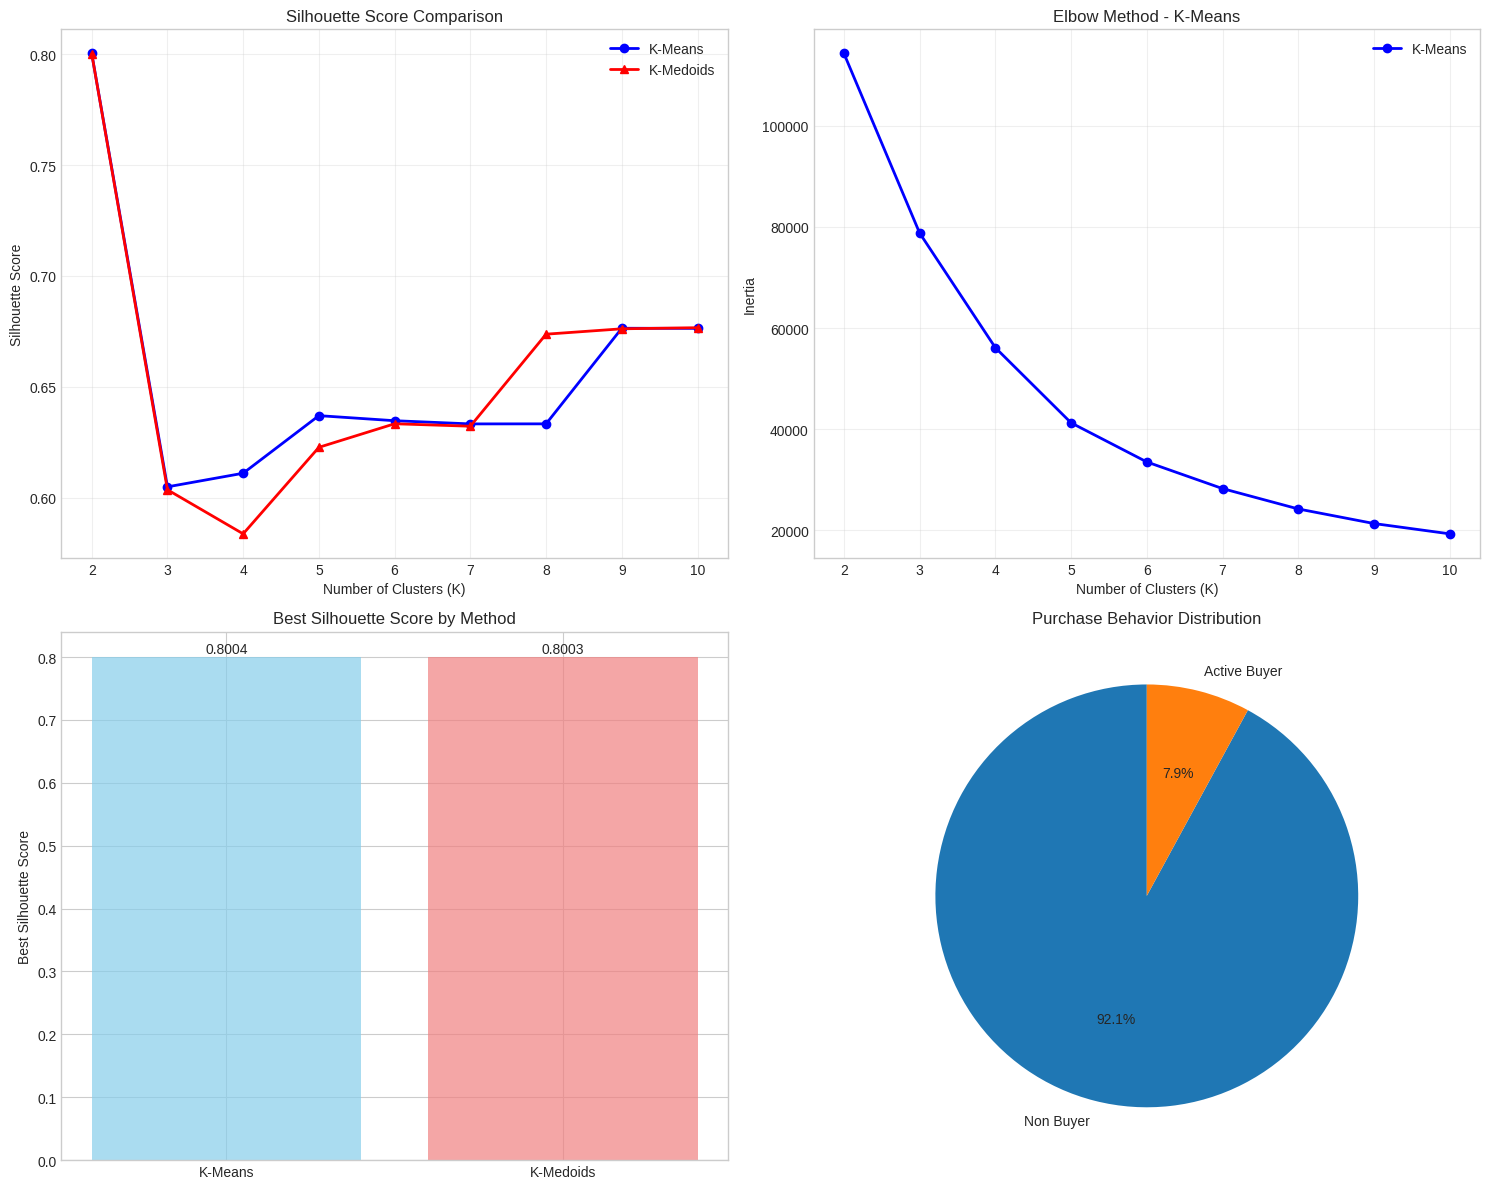

In [ ]:
# ===== VISUALISASI HASIL =====
def plot_clustering_results():
   """Visualisasi hasil clustering tanpa SMOTE"""

   fig, axes = plt.subplots(2, 2, figsize=(15, 12))

   # 1. Silhouette Score Comparison
   k_range = list(range(2, 11))

   axes[0, 0].plot(k_range, sil_scores_orig, 'o-', label='K-Means', linewidth=2, color='blue')
   axes[0, 0].plot(k_range, sil_scores_sim, '^-', label='K-Medoids', linewidth=2, color='red')
   axes[0, 0].set_xlabel('Number of Clusters (K)')
   axes[0, 0].set_ylabel('Silhouette Score')
   axes[0, 0].set_title('Silhouette Score Comparison')
   axes[0, 0].legend()
   axes[0, 0].grid(True, alpha=0.3)

   # 2. Elbow Method untuk K-Means
   axes[0, 1].plot(k_range, inertias_orig, 'o-', label='K-Means', linewidth=2, color='blue')
   axes[0, 1].set_xlabel('Number of Clusters (K)')
   axes[0, 1].set_ylabel('Inertia')
   axes[0, 1].set_title('Elbow Method - K-Means')
   axes[0, 1].legend()
   axes[0, 1].grid(True, alpha=0.3)

   # 3. Best Silhouette Scores Bar Chart
   best_scores = {
   'K-Means': max(sil_scores_orig),
   'K-Medoids': max(sil_scores_sim)
   }

   methods = list(best_scores.keys())
   scores = list(best_scores.values())
   colors = ['skyblue', 'lightcoral']

   bars = axes[1, 0].bar(methods, scores, color=colors, alpha=0.7)
   axes[1, 0].set_ylabel('Best Silhouette Score')
   axes[1, 0].set_title('Best Silhouette Score by Method')

   # Tambahkan nilai di atas bar
   for bar, score in zip(bars, scores):
       axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                      f'{score:.4f}', ha='center', va='bottom')

   # 4. Data Distribution
   axes[1, 1].pie(purchase_labels.value_counts(), labels=purchase_labels.value_counts().index,
                  autopct='%1.1f%%', startangle=90)
   axes[1, 1].set_title('Purchase Behavior Distribution')

   plt.tight_layout()
   plt.show()

# Plot hasil clustering
plot_clustering_results()

In [ ]:
print(df.columns)


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


Memulai analisis distribusi pembeli per cluster...
ANALISIS DISTRIBUSI PEMBELI PER CLUSTER

K = 2
----------------------------------------
K-MEANS (Silhouette: 0.8004):
  Cluster 0: 0/51447 pembeli (0.0%)
  Cluster 1: 4433/4435 pembeli (100.0%)
  Total: 4433 pembeli dari 55882 pelanggan
K-MEDOIDS (Silhouette: 0.8003):
  Cluster 0: 0/51449 pembeli (0.0%)
  Cluster 1: 4433/4433 pembeli (100.0%)
  Total: 4433 pembeli dari 55882 pelanggan

K = 3
----------------------------------------
K-MEANS (Silhouette: 0.6048):
  Cluster 0: 0/35353 pembeli (0.0%)
  Cluster 1: 4433/4435 pembeli (100.0%)
  Cluster 2: 0/16094 pembeli (0.0%)
  Total: 4433 pembeli dari 55882 pelanggan
K-MEDOIDS (Silhouette: 0.6035):
  Cluster 0: 0/35444 pembeli (0.0%)
  Cluster 1: 4433/4433 pembeli (100.0%)
  Cluster 2: 0/16005 pembeli (0.0%)
  Total: 4433 pembeli dari 55882 pelanggan

K = 4
----------------------------------------
K-MEANS (Silhouette: 0.6110):
  Cluster 0: 0/35347 pembeli (0.0%)
  Cluster 1: 2869/2869 pemb

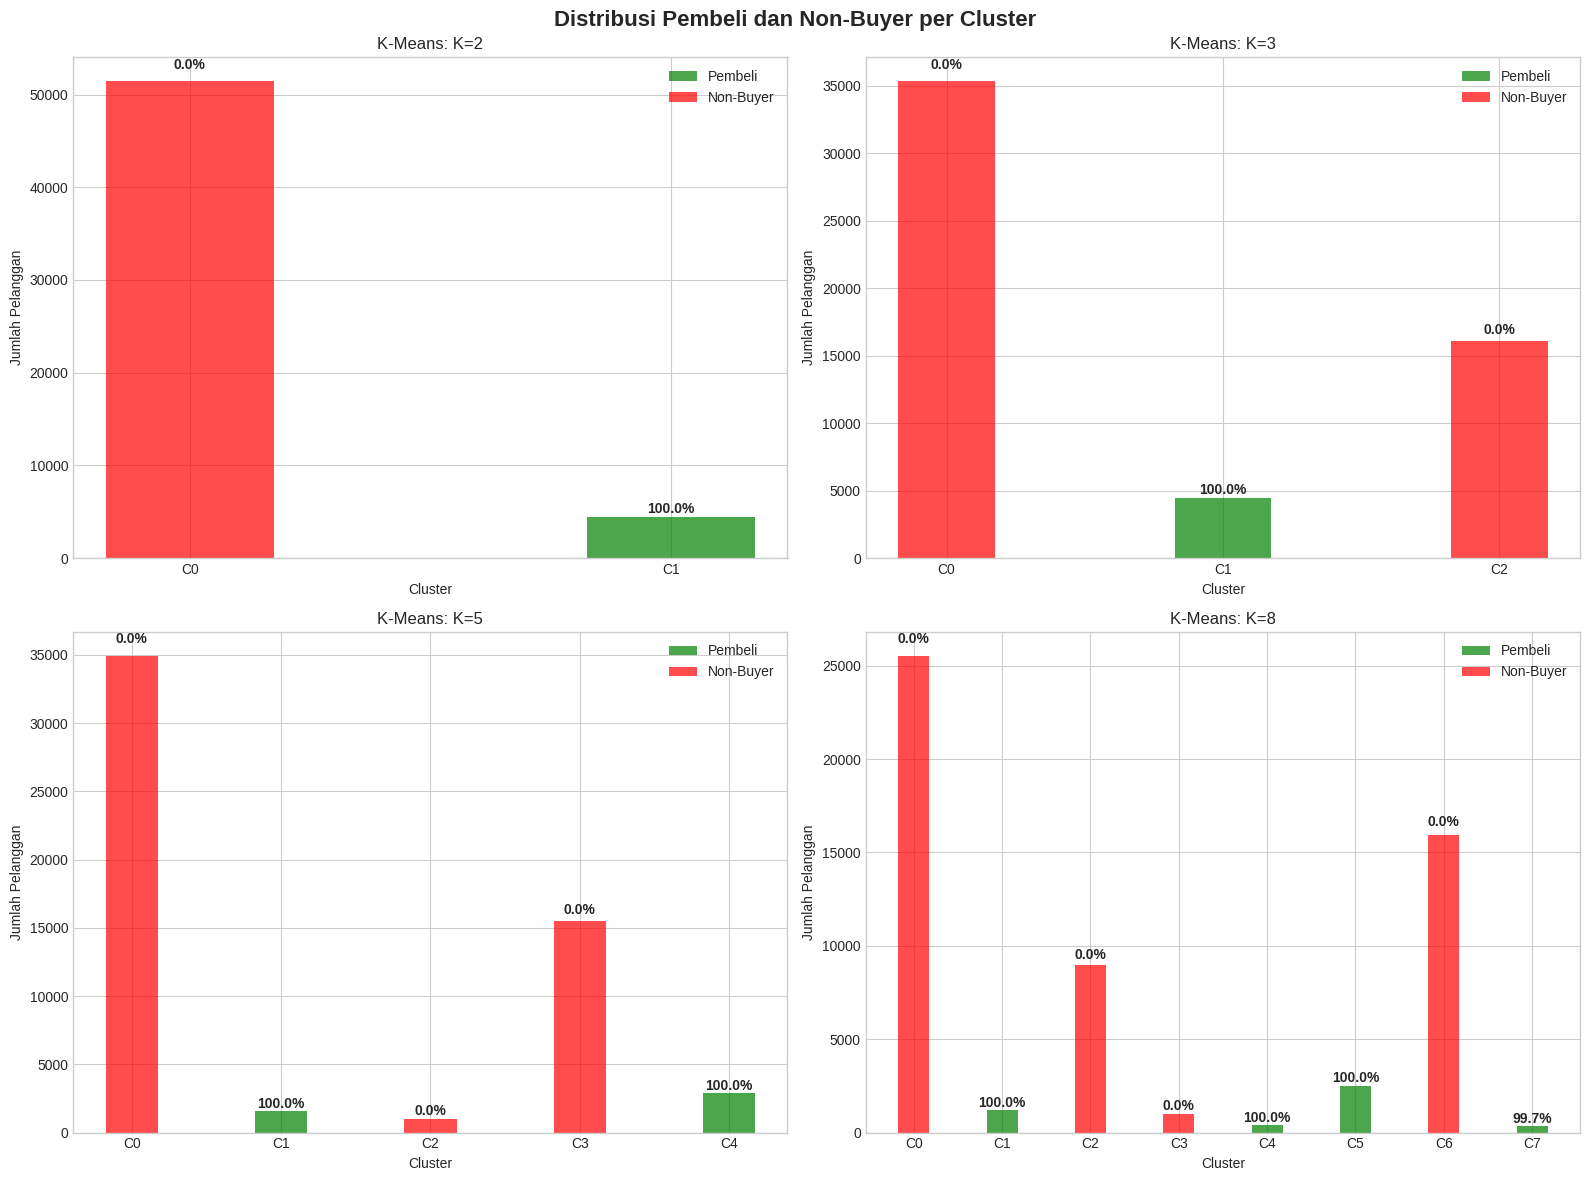

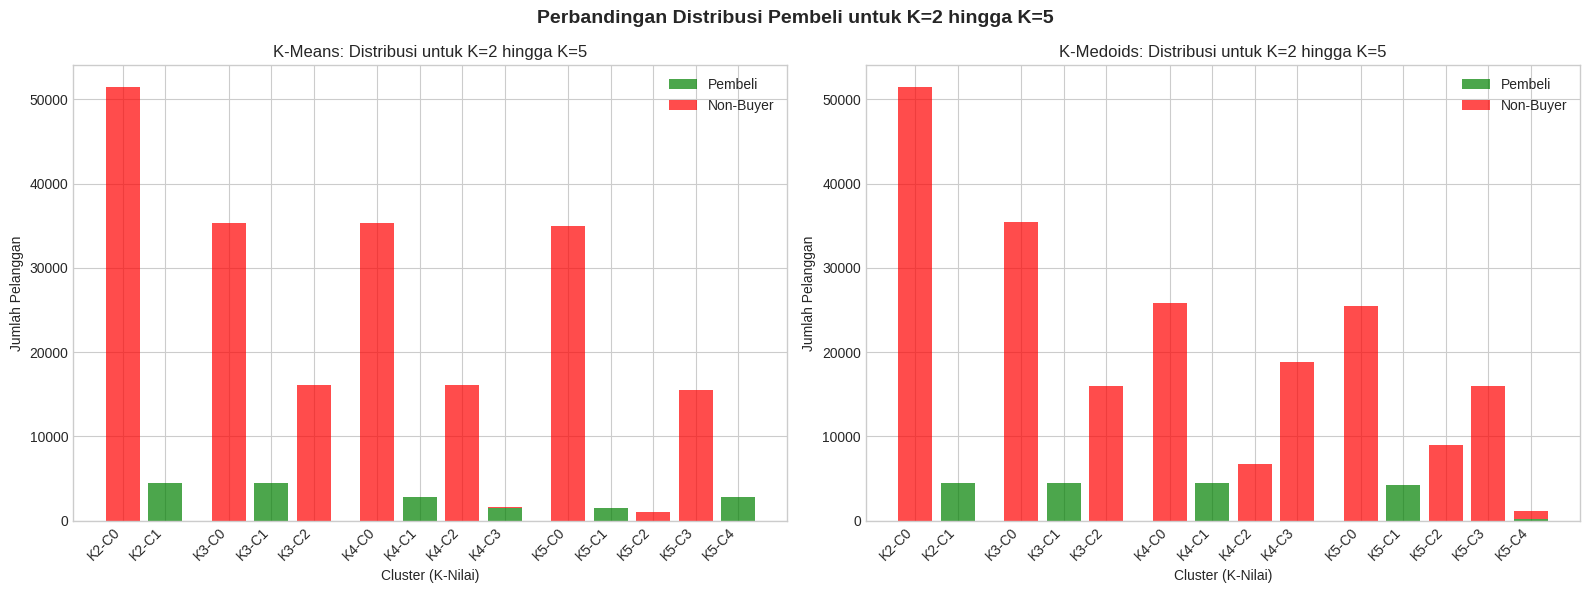

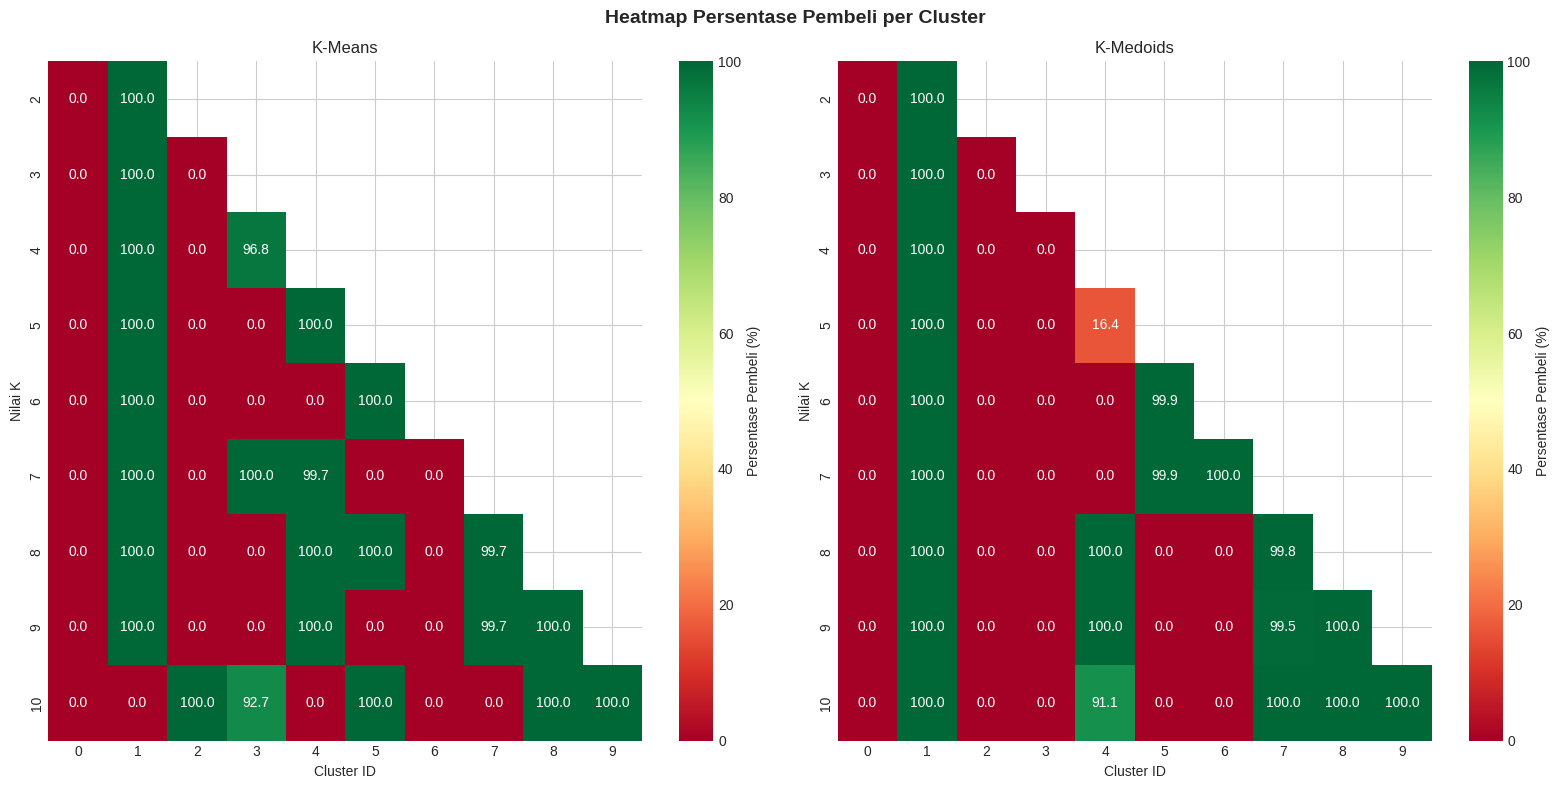


Analisis selesai.


In [ ]:
# ===== ANALISIS DISTRIBUSI PEMBELI PER CLUSTER =====

def analyze_buyer_distribution_per_cluster(original_data, X_original, kmeans_results, kmedoids_results):
    """
    Analisis distribusi pembeli per cluster untuk setiap nilai K
    """
    import pandas as pd
    import numpy as np

    print("ANALISIS DISTRIBUSI PEMBELI PER CLUSTER")
    print("="*80)

    # Use the original data to get the 'purchase_count'
    data_with_purchase = original_data.copy()
    distribution_results = {
        'kmeans': {},
        'kmedoids': {}
    }

    for k in range(2, 11):
        print(f"\nK = {k}")
        print("-" * 40)

        # K-Means Analysis
        if k in kmeans_results:
            kmeans_labels = kmeans_results[k]['labels']
            kmeans_labels_series = pd.Series(kmeans_labels, index=X_original.index)
            kmeans_silhouette = kmeans_results[k]['silhouette_score']

            print(f"K-MEANS (Silhouette: {kmeans_silhouette:.4f}):")

            kmeans_cluster_data = []
            for cluster_id in range(k):
                cluster_indices = kmeans_labels_series[kmeans_labels_series == cluster_id].index
                cluster_data_subset = data_with_purchase.loc[cluster_indices]

                total_in_cluster = len(cluster_data_subset)
                buyers_in_cluster = len(cluster_data_subset[cluster_data_subset['purchase_count'] > 0])
                non_buyers_in_cluster = len(cluster_data_subset[cluster_data_subset['purchase_count'] == 0])
                buyer_percentage = (buyers_in_cluster / total_in_cluster * 100) if total_in_cluster > 0 else 0

                kmeans_cluster_data.append({
                    'cluster': cluster_id,
                    'total': total_in_cluster,
                    'buyers': buyers_in_cluster,
                    'non_buyers': non_buyers_in_cluster,
                    'buyer_percentage': buyer_percentage
                })

                print(f"  Cluster {cluster_id}: {buyers_in_cluster}/{total_in_cluster} pembeli ({buyer_percentage:.1f}%)")

            distribution_results['kmeans'][k] = kmeans_cluster_data

            total_buyers = sum([c['buyers'] for c in kmeans_cluster_data])
            total_customers = sum([c['total'] for c in kmeans_cluster_data])
            print(f"  Total: {total_buyers} pembeli dari {total_customers} pelanggan")

        # K-Medoids Analysis
        if k in kmedoids_results:
            kmedoids_labels = kmedoids_results[k]['labels']
            kmedoids_labels_series = pd.Series(kmedoids_labels, index=X_original.index)
            kmedoids_silhouette = kmedoids_results[k]['silhouette_score']

            print(f"K-MEDOIDS (Silhouette: {kmedoids_silhouette:.4f}):")

            kmedoids_cluster_data = []
            for cluster_id in range(k):
                cluster_indices = kmedoids_labels_series[kmedoids_labels_series == cluster_id].index
                cluster_data_subset = data_with_purchase.loc[cluster_indices]

                total_in_cluster = len(cluster_data_subset)
                buyers_in_cluster = len(cluster_data_subset[cluster_data_subset['purchase_count'] > 0])
                non_buyers_in_cluster = len(cluster_data_subset[cluster_data_subset['purchase_count'] == 0])
                buyer_percentage = (buyers_in_cluster / total_in_cluster * 100) if total_in_cluster > 0 else 0

                kmedoids_cluster_data.append({
                    'cluster': cluster_id,
                    'total': total_in_cluster,
                    'buyers': buyers_in_cluster,
                    'non_buyers': non_buyers_in_cluster,
                    'buyer_percentage': buyer_percentage
                })

                print(f"  Cluster {cluster_id}: {buyers_in_cluster}/{total_in_cluster} pembeli ({buyer_percentage:.1f}%)")

            distribution_results['kmedoids'][k] = kmedoids_cluster_data

            total_buyers = sum([c['buyers'] for c in kmedoids_cluster_data])
            total_customers = sum([c['total'] for c in kmedoids_cluster_data])
            print(f"  Total: {total_buyers} pembeli dari {total_customers} pelanggan")

    return distribution_results

def create_summary_table(distribution_results):
    """
    Tabel ringkasan distribusi pembeli
    """
    import pandas as pd
    import numpy as np

    print("\nTABEL RINGKASAN DISTRIBUSI PEMBELI")
    print("="*80)

    summary_data = []

    for k in range(2, 11):
        kmeans_max_buyer = "N/A"
        kmeans_min_buyer = "N/A"
        kmedoids_max_buyer = "N/A"
        kmedoids_min_buyer = "N/A"

        if k in distribution_results['kmeans']:
            kmeans_data = distribution_results['kmeans'][k]
            buyer_percentages = [c['buyer_percentage'] for c in kmeans_data]
            if len(buyer_percentages) > 0:
                kmeans_max_buyer = f"{max(buyer_percentages):.1f}%"
                kmeans_min_buyer = f"{min(buyer_percentages):.1f}%"

        if k in distribution_results['kmedoids']:
            kmedoids_data = distribution_results['kmedoids'][k]
            buyer_percentages = [c['buyer_percentage'] for c in kmedoids_data]
            if len(buyer_percentages) > 0:
                kmedoids_max_buyer = f"{max(buyer_percentages):.1f}%"
                kmedoids_min_buyer = f"{min(buyer_percentages):.1f}%"

        summary_data.append({
            'K': k,
            'KMeans_Max_Buyer': kmeans_max_buyer,
            'KMeans_Min_Buyer': kmeans_min_buyer,
            'KMedoids_Max_Buyer': kmedoids_max_buyer,
            'KMedoids_Min_Buyer': kmedoids_min_buyer
        })

    df_summary = pd.DataFrame(summary_data)
    print(df_summary.to_string(index=False))

    print("\nKeterangan:")
    print("- Max/Min Buyer: Rentang persentase pembeli dalam cluster")

def visualize_buyer_per_cluster(distribution_results):
    """
    Visualisasi jumlah pembeli dan non-buyer per cluster untuk setiap K
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Tentukan K yang akan divisualisasikan (pilih beberapa yang menarik)
    k_values_to_plot = [2, 3, 5, 8]

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Distribusi Pembeli dan Non-Buyer per Cluster', fontsize=16, fontweight='bold')

    axes = axes.flatten()

    for idx, k in enumerate(k_values_to_plot):
        if k in distribution_results['kmeans']:
            # Data K-Means
            kmeans_data = distribution_results['kmeans'][k]
            cluster_ids = [f"C{c['cluster']}" for c in kmeans_data]
            buyers = [c['buyers'] for c in kmeans_data]
            non_buyers = [c['non_buyers'] for c in kmeans_data]

            # Buat stacked bar chart
            x = np.arange(len(cluster_ids))
            width = 0.35

            # Plot bars
            bars1 = axes[idx].bar(x, buyers, width, label='Pembeli', color='green', alpha=0.7)
            bars2 = axes[idx].bar(x, non_buyers, width, bottom=buyers, label='Non-Buyer', color='red', alpha=0.7)

            # Tambahkan label
            axes[idx].set_xlabel('Cluster')
            axes[idx].set_ylabel('Jumlah Pelanggan')
            axes[idx].set_title(f'K-Means: K={k}')
            axes[idx].set_xticks(x)
            axes[idx].set_xticklabels(cluster_ids)
            axes[idx].legend()

            # Tambahkan persentase di atas setiap bar
            for i, (buyer, total) in enumerate(zip(buyers, [b+nb for b, nb in zip(buyers, non_buyers)])):
                percentage = (buyer / total * 100) if total > 0 else 0
                # Fix: Use 'total * 0.02' instead of 'max(total) * 0.02'
                axes[idx].text(i, total + total * 0.02, f'{percentage:.1f}%',
                              ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

def plot_comparison_k_values(distribution_results):
    """
    Plot perbandingan distribusi pembeli dan non-buyer untuk K=2 hingga K=5
    """
    import matplotlib.pyplot as plt
    import numpy as np

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Perbandingan Distribusi Pembeli untuk K=2 hingga K=5', fontsize=14, fontweight='bold')

    # Plot 1: K-Means
    k_values = []
    all_buyers_kmeans = []
    all_non_buyers_kmeans = []
    cluster_labels_kmeans = []

    for k in range(2, 6):  # ⬅️ Ubah batas K sampai 5
        if k in distribution_results['kmeans']:
            k_values.append(k)
            kmeans_data = distribution_results['kmeans'][k]

            buyers_per_cluster = [c['buyers'] for c in kmeans_data]
            non_buyers_per_cluster = [c['non_buyers'] for c in kmeans_data]

            all_buyers_kmeans.append(buyers_per_cluster)
            all_non_buyers_kmeans.append(non_buyers_per_cluster)
            cluster_labels_kmeans.append([f"K{k}C{i}" for i in range(len(kmeans_data))])

    # Flatten data untuk plotting
    all_x_labels = []
    all_buyers_flat = []
    all_non_buyers_flat = []
    x_positions = []
    current_pos = 0

    for i, k in enumerate(k_values):
        buyers = all_buyers_kmeans[i]
        non_buyers = all_non_buyers_kmeans[i]
        labels = cluster_labels_kmeans[i]

        for j in range(len(buyers)):
            all_x_labels.append(f"K{k}-C{j}")
            all_buyers_flat.append(buyers[j])
            all_non_buyers_flat.append(non_buyers[j])
            x_positions.append(current_pos)
            current_pos += 1

        current_pos += 0.5  # Gap antar K

    # Plot K-Means
    ax1.bar(x_positions, all_buyers_flat, label='Pembeli', color='green', alpha=0.7)
    ax1.bar(x_positions, all_non_buyers_flat, bottom=all_buyers_flat, label='Non-Buyer', color='red', alpha=0.7)

    ax1.set_xlabel('Cluster (K-Nilai)')
    ax1.set_ylabel('Jumlah Pelanggan')
    ax1.set_title('K-Means: Distribusi untuk K=2 hingga K=5')
    ax1.legend()
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(all_x_labels, rotation=45, ha='right')

    # Plot 2: K-Medoids
    all_buyers_kmedoids = []
    all_non_buyers_kmedoids = []

    for k in range(2, 6):  # ⬅️ Ubah batas K sampai 5
        if k in distribution_results['kmedoids']:
            kmedoids_data = distribution_results['kmedoids'][k]
            buyers_per_cluster = [c['buyers'] for c in kmedoids_data]
            non_buyers_per_cluster = [c['non_buyers'] for c in kmedoids_data]
            all_buyers_kmedoids.append(buyers_per_cluster)
            all_non_buyers_kmedoids.append(non_buyers_per_cluster)

    # Flatten data untuk K-Medoids
    all_buyers_flat_km = []
    all_non_buyers_flat_km = []
    x_positions_km = []
    current_pos_km = 0

    for i, k in enumerate(k_values):
        if i < len(all_buyers_kmedoids):
            buyers = all_buyers_kmedoids[i]
            non_buyers = all_non_buyers_kmedoids[i]

            for j in range(len(buyers)):
                all_buyers_flat_km.append(buyers[j])
                all_non_buyers_flat_km.append(non_buyers[j])
                x_positions_km.append(current_pos_km)
                current_pos_km += 1

            current_pos_km += 0.5

    # Plot K-Medoids
    ax2.bar(x_positions_km, all_buyers_flat_km, label='Pembeli', color='green', alpha=0.7)
    ax2.bar(x_positions_km, all_non_buyers_flat_km, bottom=all_buyers_flat_km, label='Non-Buyer', color='red', alpha=0.7)

    ax2.set_xlabel('Cluster (K-Nilai)')
    ax2.set_ylabel('Jumlah Pelanggan')
    ax2.set_title('K-Medoids: Distribusi untuk K=2 hingga K=5')
    ax2.legend()
    ax2.set_xticks(x_positions_km)
    ax2.set_xticklabels(all_x_labels, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

def plot_buyer_percentage_heatmap(distribution_results):
    """
    Heatmap persentase pembeli per cluster untuk setiap K
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Heatmap Persentase Pembeli per Cluster', fontsize=14, fontweight='bold')

    max_k = 10

    # K-Means Heatmap
    kmeans_matrix = np.zeros((max_k-1, max_k))
    for k, clusters in distribution_results['kmeans'].items():
        for cluster_data in clusters:
            cluster_id = cluster_data['cluster']
            buyer_percentage = cluster_data['buyer_percentage']
            if cluster_id < max_k and k-2 < max_k-1:
                kmeans_matrix[k-2, cluster_id] = buyer_percentage

    kmeans_mask = np.zeros_like(kmeans_matrix, dtype=bool)
    for i, k in enumerate(range(2, 11)):
        if k <= max_k:
            kmeans_mask[i, k:] = True

    sns.heatmap(kmeans_matrix, mask=kmeans_mask, annot=True, fmt='.1f',
                cmap='RdYlGn', ax=ax1, cbar_kws={'label': 'Persentase Pembeli (%)'})
    ax1.set_title('K-Means')
    ax1.set_xlabel('Cluster ID')
    ax1.set_ylabel('Nilai K')
    ax1.set_yticklabels(range(2, 11))

    # K-Medoids Heatmap
    kmedoids_matrix = np.zeros((max_k-1, max_k))
    for k, clusters in distribution_results['kmedoids'].items():
        for cluster_data in clusters:
            cluster_id = cluster_data['cluster']
            buyer_percentage = cluster_data['buyer_percentage']
            if cluster_id < max_k and k-2 < max_k-1:
                kmedoids_matrix[k-2, cluster_id] = buyer_percentage

    kmedoids_mask = np.zeros_like(kmedoids_matrix, dtype=bool)
    for i, k in enumerate(range(2, 11)):
        if k <= max_k:
            kmedoids_mask[i, k:] = True

    sns.heatmap(kmedoids_matrix, mask=kmedoids_mask, annot=True, fmt='.1f',
                cmap='RdYlGn', ax=ax2, cbar_kws={'label': 'Persentase Pembeli (%)'})
    ax2.set_title('K-Medoids')
    ax2.set_xlabel('Cluster ID')
    ax2.set_ylabel('Nilai K')
    ax2.set_yticklabels(range(2, 11))

    plt.tight_layout()
    plt.show()

# ===== JALANKAN ANALISIS =====
print("Memulai analisis distribusi pembeli per cluster...")

distribution_results = analyze_buyer_distribution_per_cluster(data, X, kmeans_results_orig, kmedoids_sim_results)
create_summary_table(distribution_results)

# Visualisasi
print("\nMembuat visualisasi...")
visualize_buyer_per_cluster(distribution_results)
plot_comparison_k_values(distribution_results)
plot_buyer_percentage_heatmap(distribution_results)

print("\nAnalisis selesai.")

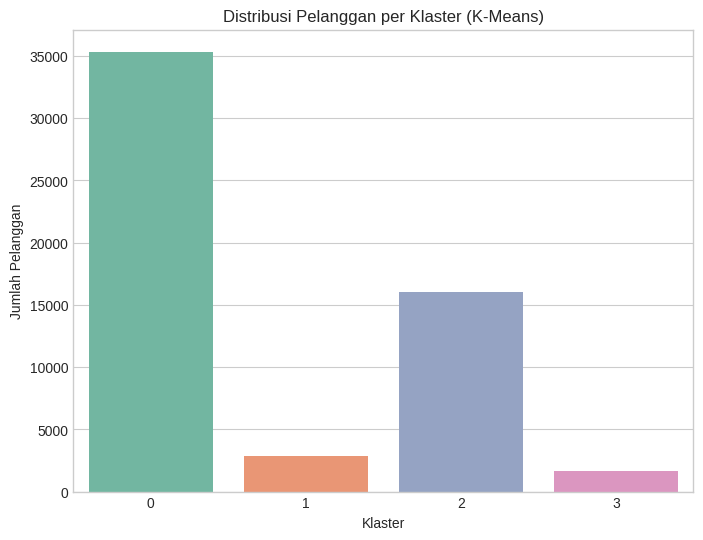

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan ini hasil terbaik K-Means dengan 4 klaster
best_k = 4
kmeans_labels = kmeans_results_orig[best_k]['labels']

# Tambahkan label ke DataFrame
data['KMeans_Cluster'] = kmeans_labels

# Plot distribusi jumlah pelanggan per klaster
plt.figure(figsize=(8, 6))
sns.countplot(x='KMeans_Cluster', data=data, palette='Set2')
plt.title('Distribusi Pelanggan per Klaster (K-Means)')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Pelanggan')
plt.show()


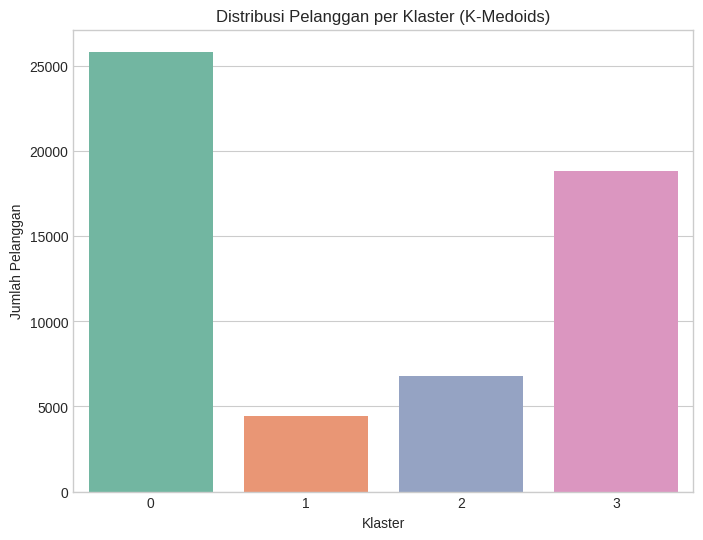

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan ini hasil terbaik K-Means dengan 4 klaster
best_k = 4
kmedoids_labels = kmedoids_sim_results[best_k]['labels']

# Tambahkan label ke DataFrame
data['KMedoids_Cluster'] = kmedoids_labels

# Plot distribusi jumlah pelanggan per klaster
plt.figure(figsize=(8, 6))
sns.countplot(x='KMedoids_Cluster', data=data, palette='Set2')
plt.title('Distribusi Pelanggan per Klaster (K-Medoids)')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Pelanggan')
plt.show()


In [ ]:
# ===== ANALISIS CLUSTER TERBAIK =====
def analyze_best_clusters():
    """Analisis cluster terbaik berdasarkan Silhouette Score"""

    # Cari model terbaik
    best_kmeans_orig_k = max(kmeans_results_orig.keys(),
                            key=lambda k: kmeans_results_orig[k]['silhouette_score'])
    best_kmeans_smote_k = max(kmeans_results_smote.keys(),
                             key=lambda k: kmeans_results_smote[k]['silhouette_score'])
    best_kmedoids_orig_k = max(kmedoids_results_orig.keys(),
                              key=lambda k: kmedoids_results_orig[k]['silhouette_score'])
    best_kmedoids_smote_k = max(kmedoids_results_smote.keys(),
                               key=lambda k: kmedoids_results_smote[k]['silhouette_score'])

    print("=== BEST CLUSTERING RESULTS ===")
    print(f"K-Means Original: K={best_kmeans_orig_k}, Silhouette={kmeans_results_orig[best_kmeans_orig_k]['silhouette_score']:.4f}")
    print(f"K-Means SMOTE: K={best_kmeans_smote_k}, Silhouette={kmeans_results_smote[best_kmeans_smote_k]['silhouette_score']:.4f}")
    print(f"K-Medoids Original: K={best_kmedoids_orig_k}, Silhouette={kmedoids_results_orig[best_kmedoids_orig_k]['silhouette_score']:.4f}")
    print(f"K-Medoids SMOTE: K={best_kmedoids_smote_k}, Silhouette={kmedoids_results_smote[best_kmedoids_smote_k]['silhouette_score']:.4f}")

    # Tentukan model terbaik overall
    all_scores = {
        'K-Means Original': kmeans_results_orig[best_kmeans_orig_k]['silhouette_score'],
        'K-Means SMOTE': kmeans_results_smote[best_kmeans_smote_k]['silhouette_score'],
        'K-Medoids Original': kmedoids_results_orig[best_kmedoids_orig_k]['silhouette_score'],
        'K-Medoids SMOTE': kmedoids_results_smote[best_kmedoids_smote_k]['silhouette_score']
    }

    best_method = max(all_scores.keys(), key=lambda k: all_scores[k])
    print(f"\n=== OVERALL BEST METHOD ===")
    print(f"Method: {best_method}")
    print(f"Silhouette Score: {all_scores[best_method]:.4f}")

    return {
        'best_method': best_method,
        'best_score': all_scores[best_method],
        'all_scores': all_scores
    }

In [ ]:
def analyze_best_clusters():
   """Analisis cluster"""

   # Cari model terbaik
   best_kmeans_orig_k = max(kmeans_results_orig.keys(),
                          key=lambda k: kmeans_results_orig[k]['silhouette_score'])
   best_kmedoids_orig_k = max(kmedoids_sim_results.keys(),
                            key=lambda k: kmedoids_sim_results[k]['silhouette_score'])

   # Ambil hasil terbaik
   best_kmeans = kmeans_results_orig[best_kmeans_orig_k]
   best_kmedoids = kmedoids_sim_results[best_kmedoids_orig_k]

   # Bandingkan semua metode
   all_results = {
       'K-Means Original': {
           'k': best_kmeans_orig_k,
           'silhouette_score': best_kmeans['silhouette_score'],
           'labels': best_kmeans['labels']
       },
       'K-Medoids': {
           'k': best_kmedoids_orig_k,
           'silhouette_score': best_kmedoids['silhouette_score'],
           'labels': best_kmedoids['labels']
       }
   }

   # Cari metode terbaik secara keseluruhan
   best_method = max(all_results.keys(),
                    key=lambda method: all_results[method]['silhouette_score'])

   print("="*60)
   print("HASIL ANALISIS CLUSTERING TERBAIK")
   print("="*60)

   for method, result in all_results.items():
       print(f"\n{method}:")
       print(f"  - K optimal: {result['k']}")
       print(f"  - Silhouette Score: {result['silhouette_score']:.4f}")

   print(f"\n{'='*60}")
   print(f"METODE TERBAIK: {best_method}")
   print(f"K optimal: {all_results[best_method]['k']}")
   print(f"Silhouette Score: {all_results[best_method]['silhouette_score']:.4f}")
   print("="*60)

   return {
       'best_method': best_method,
       'best_k': all_results[best_method]['k'],
       'best_score': all_results[best_method]['silhouette_score'],
       'best_labels': all_results[best_method]['labels'],
       'all_results': all_results
   }

# Analisis cluster terbaik
best_results = analyze_best_clusters()

HASIL ANALISIS CLUSTERING TERBAIK

K-Means Original:
  - K optimal: 2
  - Silhouette Score: 0.8004

K-Medoids:
  - K optimal: 2
  - Silhouette Score: 0.8003

METODE TERBAIK: K-Means Original
K optimal: 2
Silhouette Score: 0.8004
